In [634]:
## Imports 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct
import cv2
import sys
import numpy
import PIL
from PIL import Image
numpy.set_printoptions(threshold=sys.maxsize)

## Constants
m = 1
blocksize = 8


In [635]:

def enCompress(matrix,m = blocksize): 
    """
    enCompress function applys 2d Discrete Cosine Transform (DCT) algoritm on a given square matrix
    param1 : 2d ndarray 
    param2 : integer
    returns : Compressed 2d ndarray of shape (m,m) 
    """
    return dct(dct(matrix.T,norm = "ortho").T,norm = "ortho")[0:m,0:m]

In [636]:
def deCompress(matrix):
    """
    deCompress function applys Inverse 2d Discrete Cosine Transform (DCT) algoritm on a given square matrix
    param1 : 2d ndarray of shape (x,x)
    returns : De-compressed 2d ndarray of shape (x,x)
    """
    return idct(idct(matrix.T,norm = "ortho").T,norm = "ortho")

In [637]:
def bgr2rgb(imageArray):
    """
    rbg2rgb takes imageArray of mode "RBG" and converts it to "RGB"
    param1 : 3d ndarray shape (x,y,z)
    returns : 3d ndarray shape (x,y,z)
    """
    return np.dstack([imageArray[:,:,2],imageArray[:,:,1],imageArray[:,:,0]])

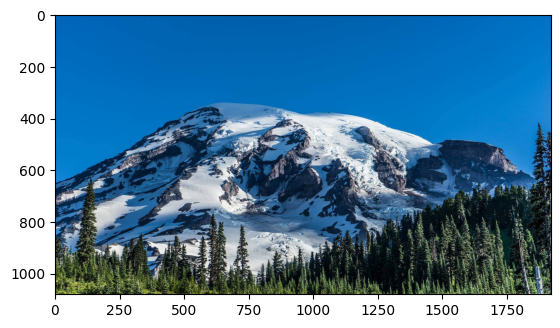

In [638]:
## Getting Image
image = cv2.imread(r"image1.png")

## Getting Data from Image
red = image[:,:,0]
blue = image[:,:,1]
green = image[:,:,2]

d1,d2,d3 = image.shape  ## Length of Image

verticalSize = d1//blocksize
horizontalSize = d2//blocksize

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [639]:
## Initializing The RBG arraies of the Comprissed Image
red_of_compressed = np.zeros(((verticalSize) * m,(horizontalSize) * m))
blue_of_compressed = np.zeros(((verticalSize) * m,(horizontalSize) * m))
green_of_compressed = np.zeros(((verticalSize) * m,(horizontalSize) * m))

In [640]:

## Compressing The Image 
for i in range(0,verticalSize):
    for j in range(0,horizontalSize):

        x = i * blocksize
        y = j * blocksize

        matrix = red[x:x+blocksize,y:y+blocksize]
        red_of_compressed[i*m : (i+1) * m , j*m : (j+1) * m] = enCompress(matrix,m)

        matrix = blue[x:x+blocksize,y:y+blocksize]
        blue_of_compressed[i*m : (i+1) * m , j*m : (j+1) * m] = enCompress(matrix,m)

        matrix = green[x:x+blocksize,y:y+blocksize]
        green_of_compressed[i*m : (i+1) * m , j*m : (j+1) * m] = enCompress(matrix,m)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


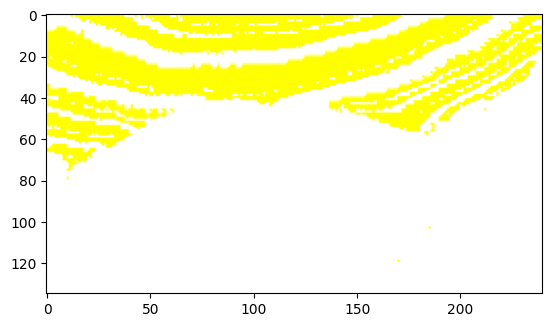

In [641]:
compressed_img = np.dstack([red_of_compressed,blue_of_compressed,green_of_compressed])
plt.imshow(compressed_img)

In [642]:
red_decompressed = np.zeros((d1,d2))
blue_decompressed = np.zeros((d1,d2))
green_decompressed = np.zeros((d1,d2))

In [643]:
## Decompressing the Image
for i in range(0,verticalSize):
    for j in range(0,horizontalSize):
        matrix = np.zeros((blocksize,blocksize))

        x = i * blocksize
        y = j * blocksize
        matrix[0:m,0:m] = red_of_compressed[i*m : (i+1) * m , j*m : (j+1) * m]
        red_decompressed[x:x+blocksize,y:y+blocksize] = deCompress(matrix)

        matrix[0:m,0:m] = blue_of_compressed[i*m : (i+1) * m , j*m : (j+1) * m]
        blue_decompressed[x:x+blocksize,y:y+blocksize] = deCompress(matrix)

        matrix[0:m,0:m] = green_of_compressed[i*m : (i+1) * m , j*m : (j+1) * m]
        green_decompressed[x:x+blocksize,y:y+blocksize] = deCompress(matrix)


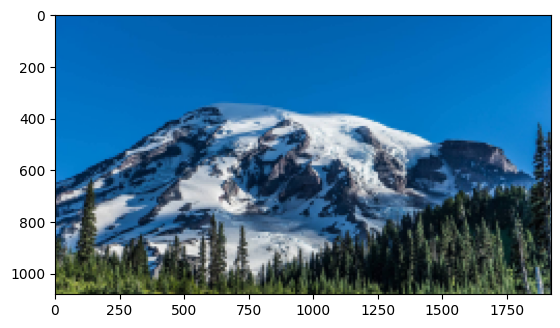

In [644]:
decompressed_img = image.copy()
decompressed_img[:,:,0] = red_decompressed
decompressed_img[:,:,1] = blue_decompressed
decompressed_img[:,:,2] = green_decompressed
plt.imshow(cv2.cvtColor(decompressed_img, cv2.COLOR_BGR2RGB))

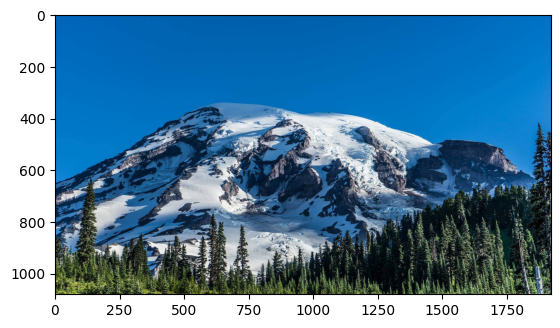

In [645]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [646]:
## Saving Images 
# Image.fromarray(compressed_img).save("Compressed.png")
# Image.fromarray(decompressed_img).save("Decompressed.png")
# plt.imsave("Compressed.png",cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB).astype("uint8"))
# plt.imsave("Decompressed.png",cv2.cvtColor(decompressed_img, cv2.COLOR_BGR2RGB).astype("uint8"))


Image.fromarray(rbg2rgb(compressed_img), mode="RGB").save("Compressed.png", format="PNG")
Image.fromarray(rbg2rgb(decompressed_img), mode="RGB").save("Decompressed.png", format="PNG")
# print("The original size of Image is: ", round(len(my_image.fp.read())/1024,2), "KB")

In [647]:
compressed_img.astype("uint8")

array([[[192,  24,   0],
        [192,  24,   0],
        [192,  24,   0],
        [208,  40,  16],
        [208,  40,  16],
        [192,  24,   0],
        [192,  24,   0],
        [192,  24,   0],
        [192,  24,   0],
        [192,  24,   0],
        [192,  24,   0],
        [192,  24,   0],
        [176,  32,   0],
        [176,  32,   0],
        [176,  32,   0],
        [176,  32,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [176,  24,   0],
        [174,  24,   0],
        [146,  31,   0],
        [144,  32,   0],
        [144,  32,   0],
        [144,  32,   0],
        [144,  32,   0],
        [144,  32,   0],
        [144,  32,   0],
        [144,  32,   0],
        [144,  24,  16],
        [144,  24,  16],
